In [1]:
#!pip install gensim --upgrade
#!pip install keras --upgrade
#!pip install pandas --upgrade
#!pip install tokenizers
#!pip install transformers
#!pip install -U pytorch-pretrained-bert
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import string
import nltk
from tensorflow import keras 
import sklearn
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from time import time
from nltk.corpus import stopwords
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow.keras.preprocessing.text
import seaborn as sns
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud,STOPWORDS


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = '/content/drive/MyDrive/twitter/train.csv'
print("Open file:", dataset_path)
#df_train = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df_train = pd.read_csv(dataset_path,header =None, sep =';', names = ['sentinecs','emotion'], encoding='utf-8')
df_train

Open file: /content/drive/MyDrive/twitter/train.csv


,sentinecs,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


In [7]:
df_train.emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [8]:
df_train.emotion.replace('sadness' , 1 , inplace = True)
df_train.emotion.replace('anger' , 2 , inplace = True)
df_train.emotion.replace('love' , 3 , inplace = True)
df_train.emotion.replace('surprise' , 4 , inplace = True)
df_train.emotion.replace('fear' , 5 , inplace = True)
df_train.emotion.replace('joy' , 6 , inplace = True)
df_train

,sentinecs,emotion
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,2
...,...,...
19995,im having ssa examination tomorrow in the morn...,1
19996,i constantly worry about their fight against n...,6
19997,i feel its important to share this info for th...,6
19998,i truly feel that if you are passionate enough...,6


In [9]:
df_train.emotion.unique()

array([1, 2, 3, 4, 5, 6])

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentinecs  20000 non-null  object
 1   emotion    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


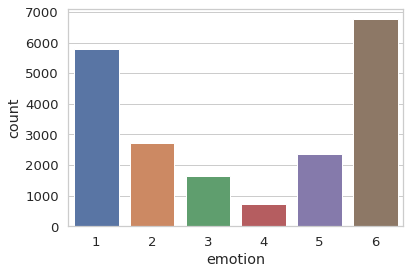

In [11]:
sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(df_train.emotion)

In [12]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df_train['sentinecs']=df_train['sentinecs'].apply(denoise_text)
df_train

,sentinecs,emotion
0,didnt feel humiliated,1
1,go feeling hopeless damned hopeful around some...,1
2,im grabbing minute post feel greedy wrong,2
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,2
...,...,...
19995,im ssa examination tomorrow morning im quite w...,1
19996,constantly worry fight nature push limits inne...,6
19997,feel important share info experience thing,6
19998,truly feel passionate enough something stay tr...,6


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
from nltk import word_tokenize
df_train['sentinecs'] = df_train.apply(lambda row: word_tokenize(row['sentinecs']), axis=1)

In [16]:
# We start by building the words vocabulary:
words = []

for tweet in df_train["sentinecs"]:
  words = words + tweet

words.append("UNK") # we add "UNK" and "ENDPAD" tokens to the vocabulary in order to use them later
words.append("ENDPAD")

n_words = len(words)
print("The size of the word vocabulary is: "+ str(n_words))

The size of the word vocabulary is: 186831


In [17]:
# Then building the tags vocabulary:
tags_vocab = list(set(df_train["emotion"].values))

n_tags = len(tags_vocab)
print("The number of Tags is: " + str(n_tags))

The number of Tags is: 6


In [18]:
df_train.dropna(subset = ["emotion"], inplace=True)

In [19]:
from collections import Counter

# Tags Counting:
Counter(df_train["emotion"])

Counter({1: 5797, 2: 2709, 3: 1641, 4: 719, 5: 2373, 6: 6761})

In [20]:
sentences = []

for tweet in df_train["sentinecs"]:
  sentences.append(tweet)

In [21]:
print("The number of sentences is: " + str(len(sentences)))

The number of sentences is: 20000


In [22]:
max_len=max([len(s) for s in sentences])
print("The longest sentence have a size of: " + str(max_len))

The longest sentence have a size of: 35


In [23]:
tags = []

for tag in df_train["emotion"]:
  tags.append(tag)

In [24]:
print("The number of tags is: " + str(len(tags)))

The number of tags is: 20000


In [25]:
# Words dictionary that maps each word to an integer:
word2idx = {w: i for i, w in enumerate(words)}

### **Input and Target data building:** 
<p>Now, we need to define a form of our input and output data</p>


In [62]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-b_cgtuwb
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-b_cgtuwb


In [57]:
from tensorflow.keras.preprocessing.sequence  import pad_sequences
# Build word input data in a form of list of sentences:
X_word = [[word2idx[w] for w in s] for s in sentences]

# Padding the sentences by adding the same integer to all sentences in order to make them all equal in term of length:
X_word = pad_sequences(maxlen=max_len, sequences=X_word, padding="post", value=n_words-1)

In [58]:
print("the shape of the word input data is: " + str(X_word.shape))

the shape of the word input data is: (20000, 35)


In [59]:
# The longest word in the vocabulary :
max_len_char=max([len(w) for w in words])
print("The longest word have a size of: " + str(max_len_char) + " character")

The longest word have a size of: 74 character


In [60]:
from tensorflow.keras.utils import to_categorical
# Build BIO_tag output data in a form of list of sentences:
y = list(df_train["emotion"])


# Encode the y data using one-hot encoding:
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

In [61]:
len(y)

20000

###**Splitting Data:**
<p>We will split data to 70% training, 15% validation and 15% for testing.</p>

In [32]:
# Spliting the testing data form the whole data:
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.15, random_state=1, shuffle=True ,stratify=y)

y_tr_b = y_tr
# Splitting the Validation Data from the rest of the previous splitting:
X_word_tr, X_word_val, y_tr, y_val = train_test_split(X_word_tr, y_tr_b, test_size=0.18, random_state=1, shuffle=True,stratify=y_tr_b)

In [33]:
print(X_word_tr.shape, X_word_val.shape, X_word_te.shape)
print(len(y_tr), len(y_val), len(y_te))

(13940, 35) (3060, 35) (3000, 35)
13940 3060 3000


In [36]:
# you should downgrade the numpy
!pip install -U numpy==1.18.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 1.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but

In [37]:
inputs = keras.Input(shape=(max_len,))
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(input_dim=n_words,
                     output_dim=300,
                     input_length=max_len,
                     trainable=False)(inputs)
# Add 2 bidirectional LSTMs

# lstm_1 parameters: 
lstm_1_num_units = 180
lstm_1_activation = "tanh"
lstm_1_dropout=0.2
lstm_1_rec_activation = "sigmoid"
lstm_1_rec_dropout=0.2

x = layers.Bidirectional(layers.LSTM(units=lstm_1_num_units,
                             activation=lstm_1_activation,
                             recurrent_activation=lstm_1_rec_activation,
                             use_bias=True,
                             kernel_initializer="glorot_uniform",
                             recurrent_initializer="orthogonal",
                             bias_initializer="zeros",
                             unit_forget_bias=True,
                             kernel_regularizer=None,
                             recurrent_regularizer=None,
                             bias_regularizer=None,
                             activity_regularizer=None,
                             kernel_constraint=None,
                             recurrent_constraint=None,
                             bias_constraint=None,
                             dropout=lstm_1_dropout,
                             recurrent_dropout=lstm_1_rec_dropout,
                             implementation=2,
                             return_sequences=True,
                             return_state=False,
                             go_backwards=False,
                             stateful=False))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(units=n_tags+1,
                                activation="softmax", 
                                use_bias=True,
                                kernel_initializer="glorot_uniform",
                                bias_initializer="zeros",
                                kernel_regularizer=None,
                                bias_regularizer=None,
                                activity_regularizer=None,
                                kernel_constraint=None,
                                bias_constraint=None)(x)
model = keras.Model(inputs, outputs)
loss="categorical_crossentropy"
model.compile(optimizer="adam", loss= loss, metrics=["accuracy"] )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 300)           56049300  
                                                                 
 bidirectional (Bidirectiona  (None, 35, 360)          692640    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              217600    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 56,960,443
Trainable params: 911,143
Non-traina

In [49]:
#history = model.fit(X_tr, np.array(y_tr), batch_size=32,callbacks=[f1score], epochs=2, validation_split=0.18, verbose=1)
batch_size = 32
epochs = 15
history = model.fit(X_word_tr,np.array(y_tr),
                    validation_data=(X_word_val,np.array(y_val)),
                    epochs = epochs,
                    batch_size = batch_size,   
                    verbose=1)

Epoch 1/15
436/436 [==============================] - 186s 427ms/step - loss: 0.4032 - accuracy: 0.8471 - val_loss: 0.5146 - val_accuracy: 0.8131
Epoch 2/15
436/436 [==============================] - 188s 430ms/step - loss: 0.3616 - accuracy: 0.8628 - val_loss: 0.4726 - val_accuracy: 0.8248
Epoch 3/15
436/436 [==============================] - 185s 425ms/step - loss: 0.3269 - accuracy: 0.8776 - val_loss: 0.4646 - val_accuracy: 0.8294
Epoch 4/15
436/436 [==============================] - 185s 425ms/step - loss: 0.2947 - accuracy: 0.8856 - val_loss: 0.4528 - val_accuracy: 0.8376
Epoch 5/15
436/436 [==============================] - 186s 426ms/step - loss: 0.2589 - accuracy: 0.9004 - val_loss: 0.4316 - val_accuracy: 0.8431
Epoch 6/15
436/436 [==============================] - 185s 425ms/step - loss: 0.2404 - accuracy: 0.9085 - val_loss: 0.4329 - val_accuracy: 0.8513
Epoch 7/15
436/436 [==============================] - 185s 424ms/step - loss: 0.2161 - accuracy: 0.9170 - val_loss: 0.4360 -

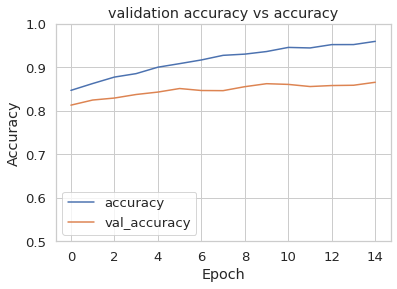

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
pyplot.title('validation accuracy vs accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()


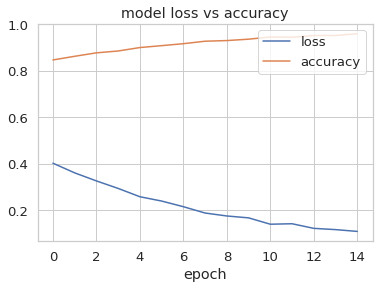

In [51]:
 pyplot.plot(history.history['loss'])
 pyplot.plot(history.history['accuracy'])
 pyplot.title('model loss vs accuracy')
 pyplot.xlabel('epoch')
 pyplot.legend(['loss', 'accuracy'], loc='upper right')
 pyplot.show()

In [52]:
test_loss, test_acc = model.evaluate(X_word_te,  np.array(y_te), verbose=2)
print(test_acc)


94/94 - 8s - loss: 0.3971 - accuracy: 0.8763 - 8s/epoch - 81ms/step
0.8763333559036255


In [63]:
clf = model.predict(X_word_te, verbose=0)

In [64]:
clf

array([[8.7248528e-09, 9.9666816e-01, 2.8760377e-03, ..., 1.4837159e-06,
        1.4646251e-05, 4.3257134e-04],
       [3.7658316e-07, 3.8658482e-01, 6.1142808e-01, ..., 4.0829508e-04,
        3.8299261e-04, 8.3895755e-04],
       [2.2806331e-08, 1.9310765e-03, 4.5830773e-05, ..., 4.6133987e-06,
        9.9793077e-01, 7.3855430e-05],
       ...,
       [2.5395869e-08, 9.9492657e-01, 2.1403555e-03, ..., 2.2805292e-05,
        7.2668813e-06, 5.0059904e-04],
       [3.7478372e-08, 4.9883651e-04, 8.2553139e-05, ..., 5.1566665e-05,
        5.7405872e-05, 9.9922657e-01],
       [6.7954495e-08, 1.7125740e-03, 9.3993665e-05, ..., 2.0323465e-05,
        1.1015346e-03, 9.9626797e-01]], dtype=float32)

In [65]:
def pred2label(pred):
    out = []
    for p in pred:
      max = np.argmax(p)
      out.append(max)
    return out
test_pred = model.predict(X_word_te, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

94/94 [==============================] - 8s 80ms/step


In [66]:
from sklearn.metrics import classification_report

print("Classification Report Summary: {:.1%}", classification_report(test_labels, pred_labels))

Classification Report Summary: {:.1%}               precision    recall  f1-score   support

           1       0.91      0.91      0.91       870
           2       0.85      0.90      0.87       406
           3       0.84      0.72      0.78       246
           4       0.87      0.63      0.73       108
           5       0.88      0.83      0.85       356
           6       0.87      0.92      0.89      1014

    accuracy                           0.88      3000
   macro avg       0.87      0.82      0.84      3000
weighted avg       0.88      0.88      0.87      3000



In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)

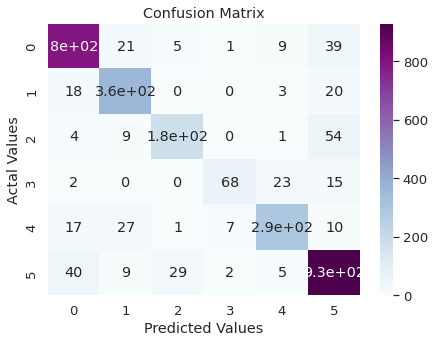

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="BuPu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()